Figure saved as FigA1_Effective_Potential.pdf


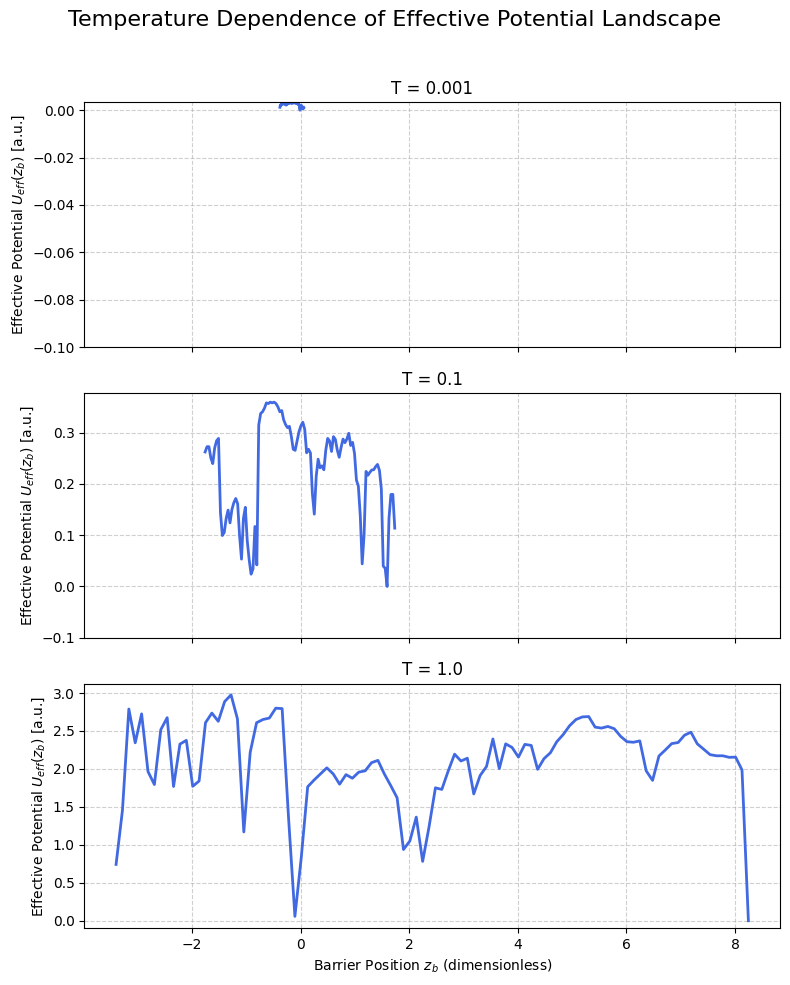

In [6]:
# ===============================================================
# SCRIPT: A1_01_Generate_Effective_Potential_v1.ipynb (Corrected)
# ===============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- パラメータ設定 ---
TEMPERATURES = [0.001, 0.1, 1.0]
DATA_FILES = {
    0.001: '3d_cl_T0.001_Pout_raw.csv',
    0.1:   '3d_cl_T0.1_Pout_raw.csv',
    1.0:   '3d_cl_T1.0_Pout_raw.csv'
}
BINS = 100
EPSILON = 1e-9

# --- プロットの準備 ---
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
fig.suptitle('Temperature Dependence of Effective Potential Landscape', fontsize=16)

# --- 各温度でループ処理 ---
for i, T in enumerate(TEMPERATURES):
    ax = axes[i]

    # 1. データの読み込み
    try:
        df = pd.read_csv(DATA_FILES[T])
        # 【修正点】列名を 'z_b' から 'zb_position' に修正
        zb_timeseries = df['zb_position']
    except KeyError:
        print(f"エラー: ファイル {DATA_FILES[T]} に 'zb_position' という列が見つかりません。")
        print(f"利用可能な列: {df.columns.tolist()}")
        continue
    except FileNotFoundError:
        print(f"エラー: ファイル {DATA_FILES[T]} が見つかりません。")
        continue

    # 2. 確率密度関数 p(zb|T) の計算
    hist, bin_edges = np.histogram(zb_timeseries, bins=BINS, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # 3. 有効ポテンシャル U_eff の計算
    U_eff = -T * np.log(hist + EPSILON)

    # 4. ポテンシャルの最小値が0になるようにオフセットを調整
    U_eff -= np.min(U_eff)

    # 5. プロット
    ax.plot(bin_centers, U_eff, color='royalblue', linewidth=2)
    ax.set_ylabel('Effective Potential $U_{eff}(z_b)$ [a.u.]')
    ax.set_title(f'T = {T}')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_ylim(bottom=-0.1)

axes[-1].set_xlabel('Barrier Position $z_b$ (dimensionless)')
plt.tight_layout(rect=[0, 0, 1, 0.96])

# --- 図の保存 ---
output_filename = 'FigA1_Effective_Potential.pdf'
plt.savefig(output_filename)
print(f"Figure saved as {output_filename}")

plt.show()